In [11]:
import matplotlib.pyplot as plt #plotting
import numpy as np #vectorized operations
import pandas as pd #data analysis

import pandas_datareader as pdr #wrapper to import data
import datetime as dt #date-time objects

import statsmodels.api as sms ## X and Y are the inputs, their dimen need to match!!

import statsmodels.api as sm

import statsmodels.formula.api as sma

import seaborn as sns

from stargazer.stargazer import Stargazer


In [12]:
def close_to_close_returns(adj_close): # Adjusted Close prices
    return adj_close / adj_close.shift() - 1 # use the shift function to compute the daily returns

def multi_lin_least_squares_parameters(X, Y): # X is the matrix, Y is the column vector, we want to find \hat\beta
    X = sm.add_constant(X).values
    Y = Y.values
    if np.linalg.det(np.matmul(X.transpose(),X))==0: #linalg: linear algebra, np.matmul: marix multiplication
        return print('Data matrix is not invertible')
    else:
        return np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)), np.matmul(X.transpose(),Y)) #(X^TX)^{-1}X^TY=\hat \beat
    
def multi_lin_best_fit_plane(X,Y):
    import statsmodels.api as sm
    X = sm.add_constant(X)
    params = multi_lin_least_squares_parameters(X,Y)
    Y_hat = np.matmul(X.values, params)
    return Y_hat


In [15]:
Data=pd.read_csv('/Users/connor/Documents/S&P_Data.csv')
for i in [Data]:
    i['ret'] = close_to_close_returns(i['sp_close'])*100
Data['logret']=np.log(np.abs(Data['ret']))
Data=Data.dropna()
DataReg1=DataReg1=pd.DataFrame({'sp_close':Data['sp_close'],'RGDP':Data['RGDP'],'UE':Data['UE'],'CPI':Data['CPI'],'PPI':Data['PPI'],'PCE':Data['PCE']})
Data

,Date,sp_close,UE,RGDP,b,CPI,PPI,PCE,ret,logret
1,2000-02-29,1388.87,4.1,12920.764,1,170.000,129.8,6619.7,-2.575776,0.946151
2,2000-03-31,1442.21,4.0,12993.210,1,171.000,130.8,6685.8,3.840532,1.345611
3,2000-04-30,1461.36,3.8,13156.939,1,170.900,130.7,6671.1,1.327823,0.283541
4,2000-05-31,1418.48,4.0,13141.686,1,171.200,131.6,6707.6,-2.934253,1.076453
5,2000-06-30,1461.96,4.0,13183.065,1,172.200,133.8,6743.9,3.065253,1.120130
...,...,...,...,...,...,...,...,...,...,...
248,2020-09-30,3365.52,7.8,18833.535,1,260.149,195.5,14582.7,-0.772177,-0.258542
249,2020-10-31,3418.70,6.9,18946.111,1,260.462,196.5,14627.1,1.580142,0.457515
250,2020-11-30,3548.99,6.7,18711.035,1,260.927,198.3,14532.8,3.811098,1.337917
251,2020-12-31,3695.31,6.7,18702.817,1,261.560,200.6,14451.1,4.122863,1.416548


In [16]:
ml_params2=multi_lin_least_squares_parameters(Data[['RGDP','UE','CPI','PPI','PCE']],Data['sp_close'])
ml_params2

array([ 4.79116244e+03, -6.27130178e-01, -1.01897035e+02,  9.60000278e+00,
       -1.32790530e+01,  7.36812449e-01])

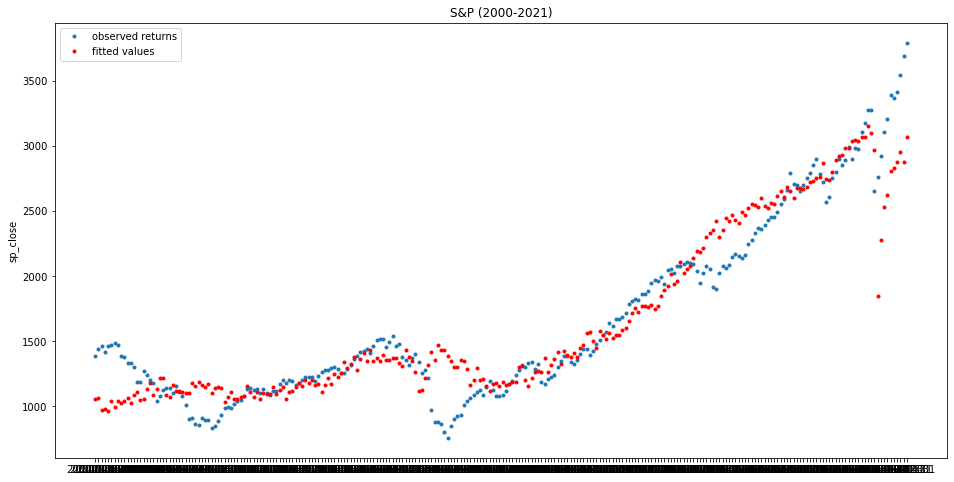

In [17]:
plt.figure(figsize=(16,8))
plt.title('S&P (2000-2021)')
plt.ylabel('sp_close')
plt.plot(Data['Date'],Data['sp_close'],'.',label='observed returns')
plt.plot(Data['Date'],multi_lin_best_fit_plane(Data[['RGDP','UE','CPI','PPI','PCE']], Data['sp_close']),'r.', label='fitted values')
plt.legend();


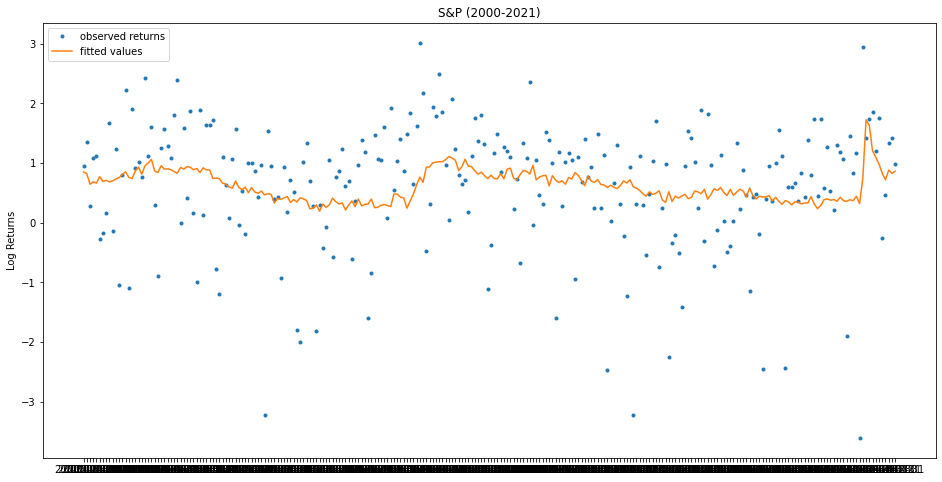

In [18]:
plt.figure(figsize=(16,8))
plt.title('S&P (2000-2021)')
plt.ylabel('Log Returns')
plt.plot(Data['Date'],Data['logret'],'.',label='observed returns')
plt.plot(Data['Date'],multi_lin_best_fit_plane(Data[['RGDP','UE','CPI','PPI','PCE']], Data['logret']), label='fitted values')
plt.legend();

In [19]:
model2=sma.ols('sp_close ~ RGDP + UE + CPI + PPI + PCE',Data).fit()
print(model2.params)
print(model2.summary())

Intercept    4791.162438
RGDP           -0.627130
UE           -101.897035
CPI             9.600003
PPI           -13.279053
PCE             0.736812
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               sp_close   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     381.1
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          1.26e-113
Time:                        14:25:55   Log-Likelihood:                -1730.1
No. Observations:                 252   AIC:                             3472.
Df Residuals:                     246   BIC:                             3493.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

In [20]:
model3=sma.ols('logret ~ RGDP + UE + PCE + PPI + CPI',Data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 logret   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.873
Date:                Mon, 26 Apr 2021   Prob (F-statistic):             0.0153
Time:                        14:25:57   Log-Likelihood:                -366.06
No. Observations:                 252   AIC:                             744.1
Df Residuals:                     246   BIC:                             765.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3307      6.879      1.211      0.2

In [21]:
from stargazer.stargazer import Stargazer
stargazer = Stargazer([model2, model3])
stargazer

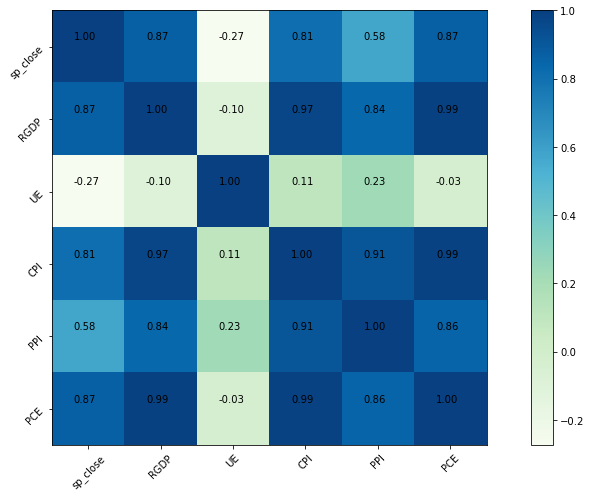

In [22]:
plt.figure(figsize=(16,8))
plt.imshow(DataReg1.corr(),cmap=plt.cm.GnBu,interpolation='nearest',data=True)
plt.colorbar()
tick_marks=[i for i in range(len(DataReg1.columns))]
plt.xticks(tick_marks,DataReg1.columns, rotation=45)
plt.yticks(tick_marks,DataReg1.columns, rotation=45)

for i in range(len(DataReg1.columns)):
    for j in range(len(DataReg1.columns)):
        text = '%.2f'%(DataReg1.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)

In [23]:
model_CPI=sma.ols('sp_close ~ RGDP + UE + PPI + PCE',Data).fit()
print(model_CPI.summary())

                            OLS Regression Results                            
Dep. Variable:               sp_close   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     476.5
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          8.16e-115
Time:                        14:26:54   Log-Likelihood:                -1730.5
No. Observations:                 252   AIC:                             3471.
Df Residuals:                     247   BIC:                             3489.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5858.0560    998.652      5.866      0.0

In [25]:
model_CPI_PPI=sma.ols('sp_close ~ RGDP + PCE + UE',Data).fit()
print(model_CPI_PPI.summary())

                            OLS Regression Results                            
Dep. Variable:               sp_close   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     471.0
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          4.45e-102
Time:                        14:28:11   Log-Likelihood:                -1763.7
No. Observations:                 252   AIC:                             3535.
Df Residuals:                     248   BIC:                             3550.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7668.1677   1111.546      6.899      0.0

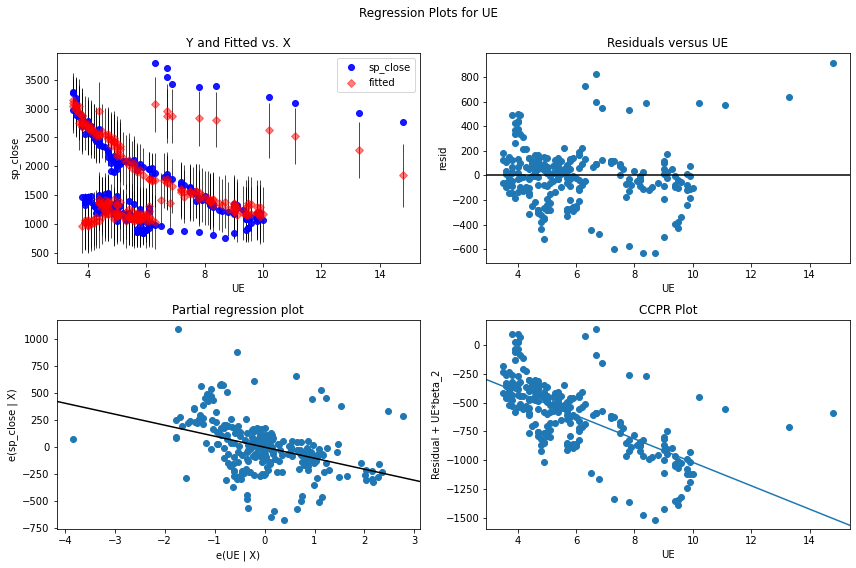

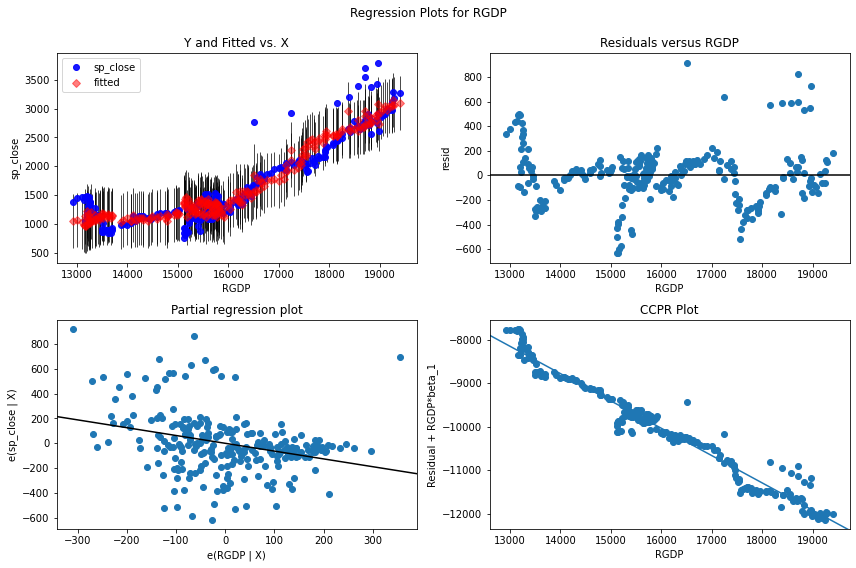

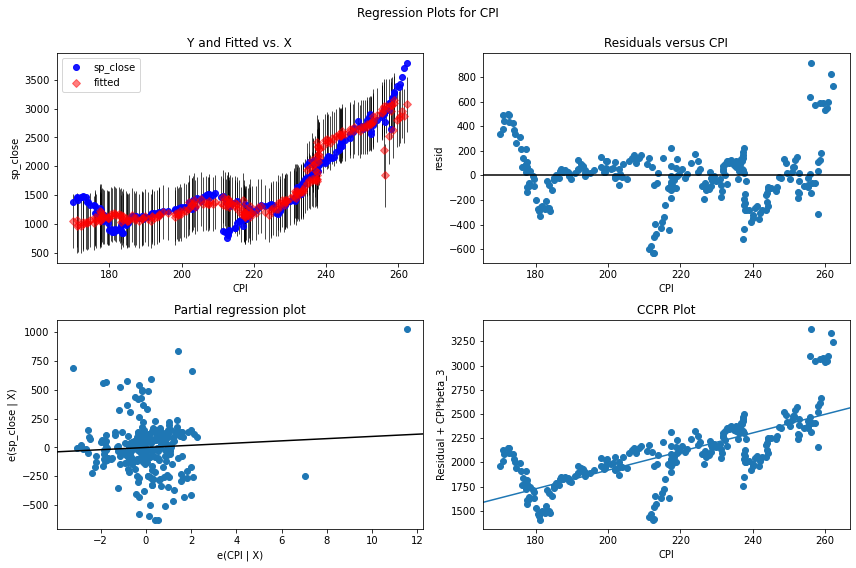

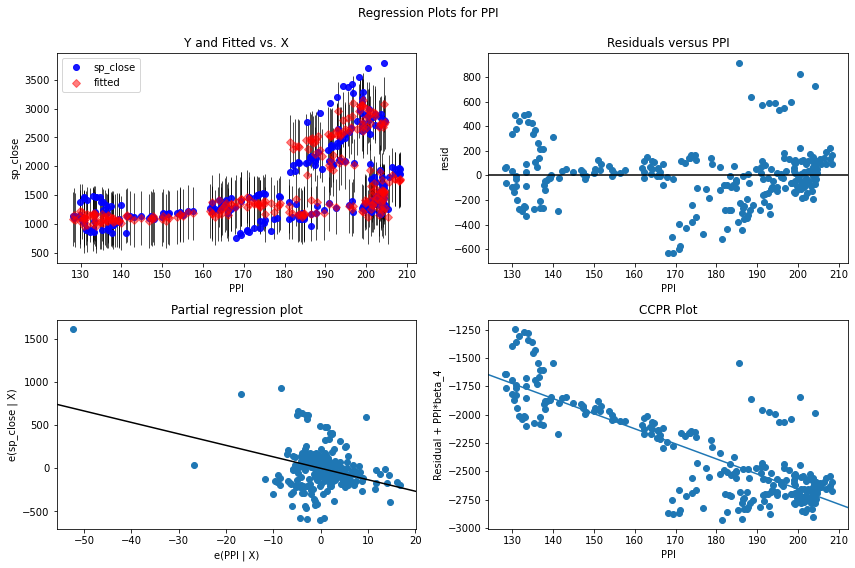

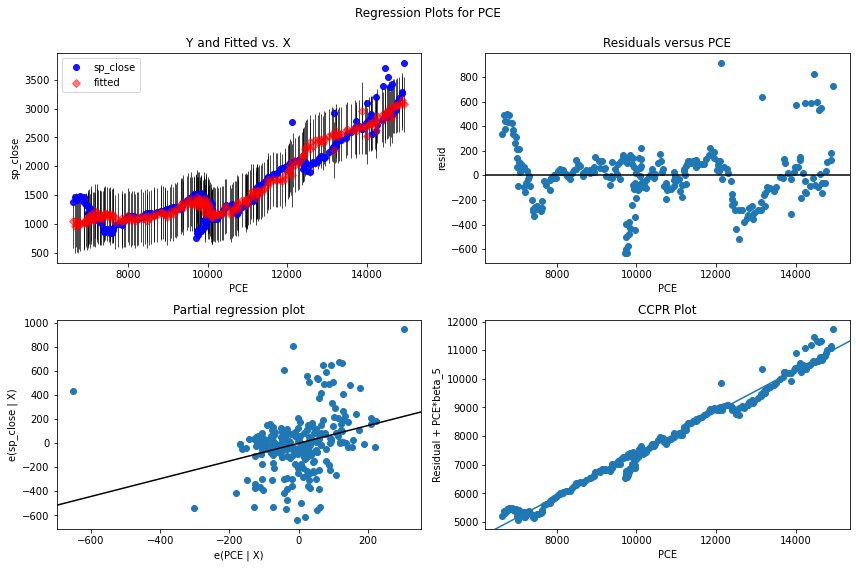

In [26]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'UE', fig=fig)

fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(model2, 'RGDP', fig=fig2)

fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(model2, 'CPI', fig=fig3)

fig4 = plt.figure(figsize=(12,8))
fig4 = sm.graphics.plot_regress_exog(model2, 'PPI', fig=fig4)

fig5 = plt.figure(figsize=(12,8))
fig5 = sm.graphics.plot_regress_exog(model2, 'PCE', fig=fig5)

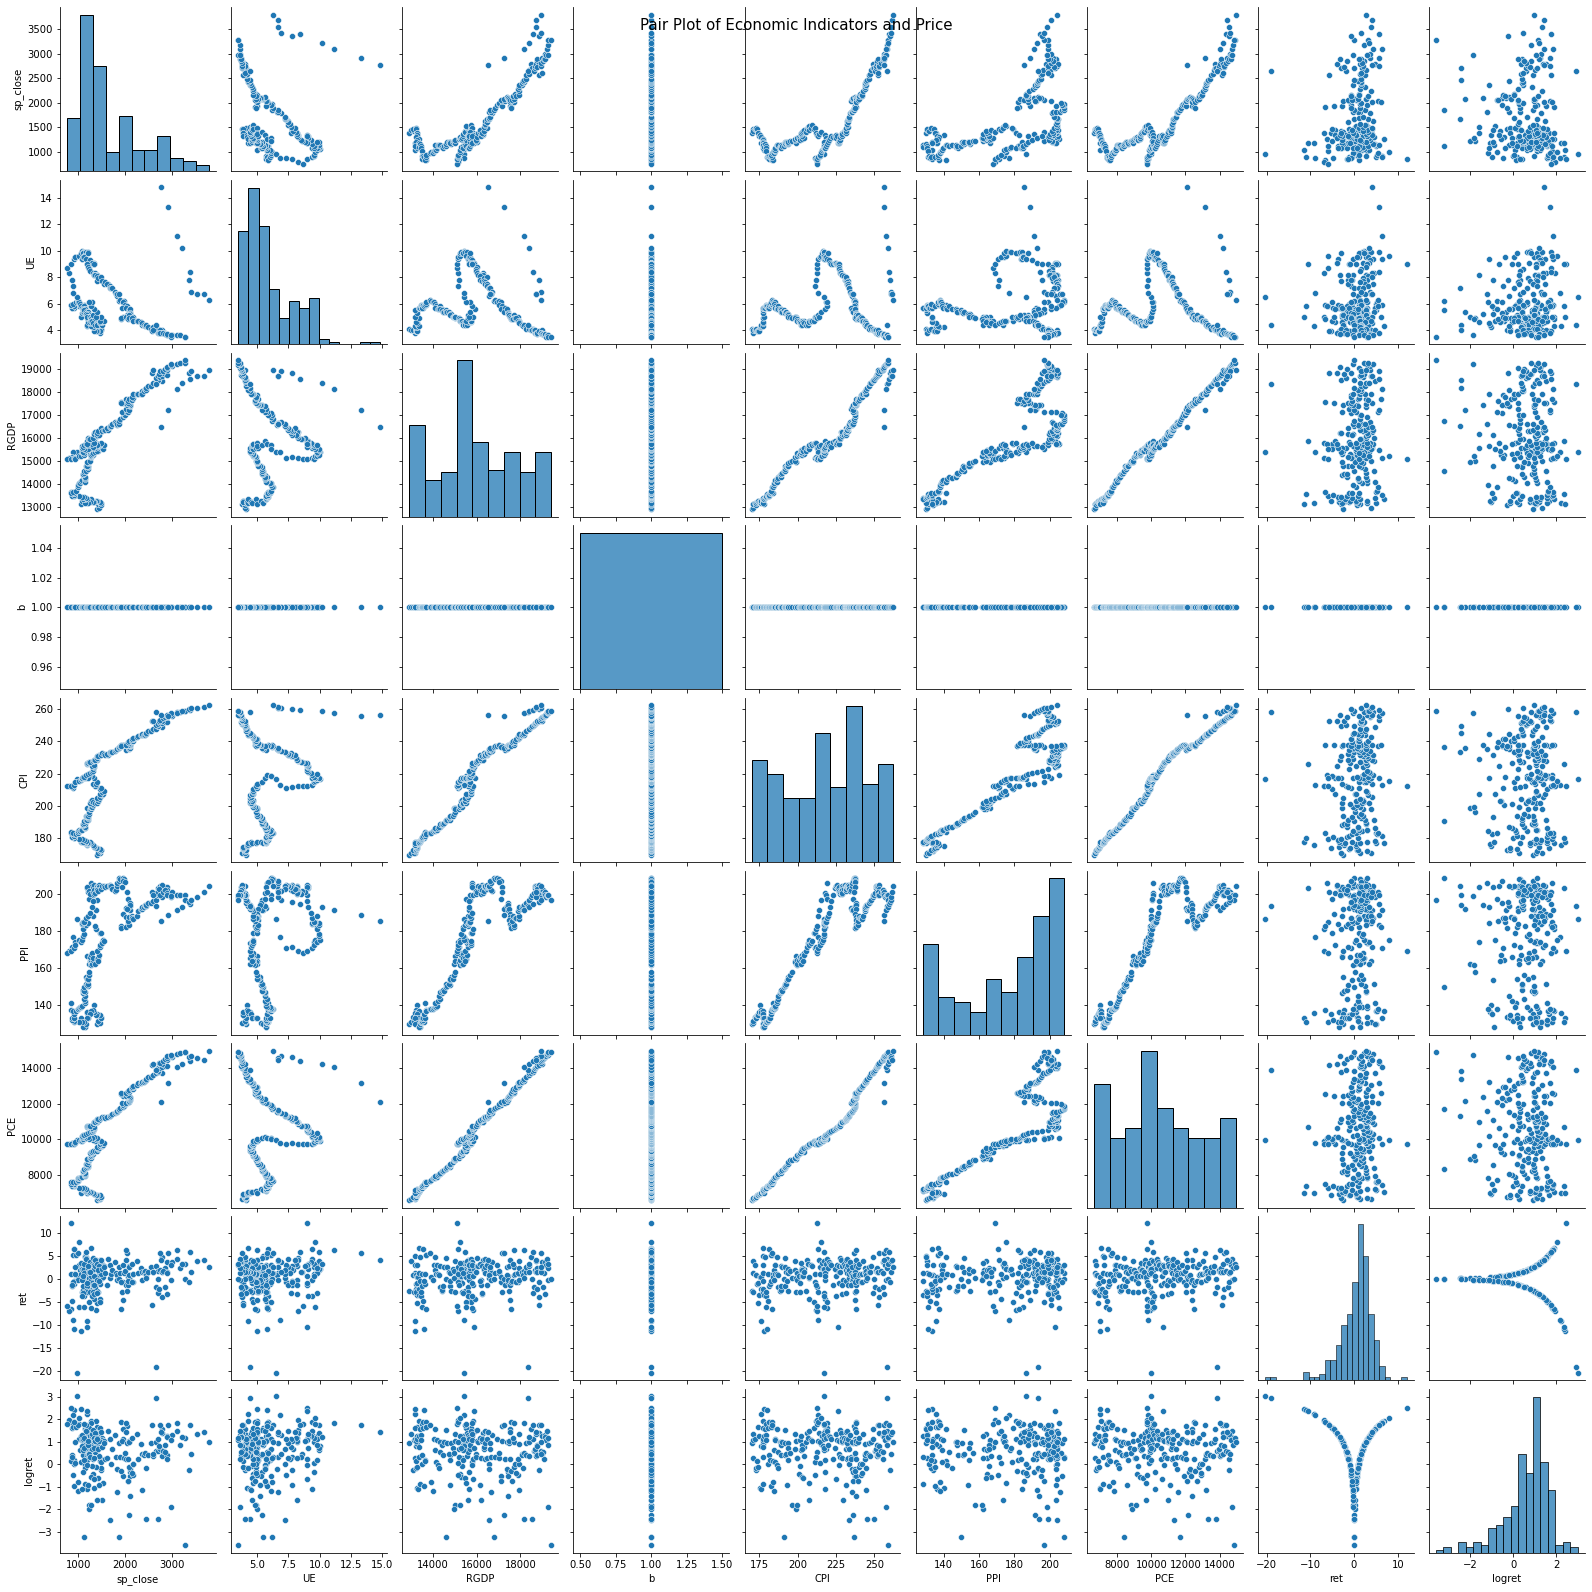

In [28]:
sns.pairplot(Data)
plt.suptitle('Pair Plot of Economic Indicators and Price', 
             size = 15);

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=Data[['RGDP','UE','CPI','PPI','PCE']]
y=Data['sp_close']
y1=Data['logret']
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LinearRegression().fit(x_train, y_train)
print("Intercept: " + str(model.intercept_))
print("-------------------")
print("COEFFS: " + str(model.coef_))
print("-------------------")
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

Intercept: 3066.8628047826596
-------------------
COEFFS: [  -0.52385158 -113.82961192   20.72867664  -14.30020295    0.53673185]
-------------------
0.8894607665945503
0.8696590011449152


0.9986374777318593
0.9824079137546836


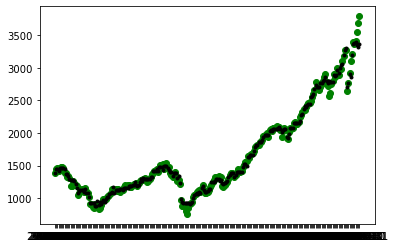

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))

plt.scatter(Data['Date'], y,color='g')
plt.plot(Data['Date'], model.predict(x),'.k')

plt.show()

0.9978680393492809
0.9781213142587731


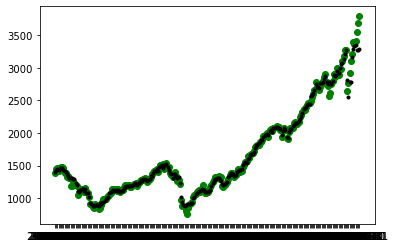

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))
plt.scatter(Data['Date'], y,color='g')
plt.plot(Data['Date'], model.predict(x),'.k')

plt.show()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y1)
model2 = LinearRegression().fit(x_train, y_train)
print("Intercept: " + str(model2.intercept_))
print("-------------------")
print("COEFFS: " + str(model2.coef_))
print("-------------------")

print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))


Intercept: 7.796471138469956
-------------------
COEFFS: [-0.00115188 -0.01351025  0.03180328 -0.01252653  0.00062502]
-------------------
0.06446252880995373
-0.004479020989704097


In [34]:
model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))

0.7379420617326408
0.061769858241218056


In [35]:
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))

0.8275363597409654
0.07159363997543433


In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [37]:
reg = LassoCV()
reg.fit(x, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Best alpha using built-in LassoCV: 75133.956630
Best score using built-in LassoCV: 0.754181
Lasso picked 1 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

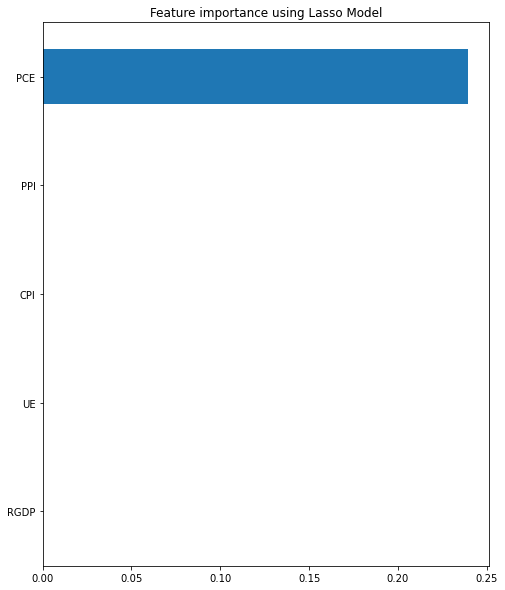

In [38]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [39]:
reg = LassoCV()
reg.fit(x, y1)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y1))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 1.571585
Best score using built-in LassoCV: 0.052136
Lasso picked 2 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

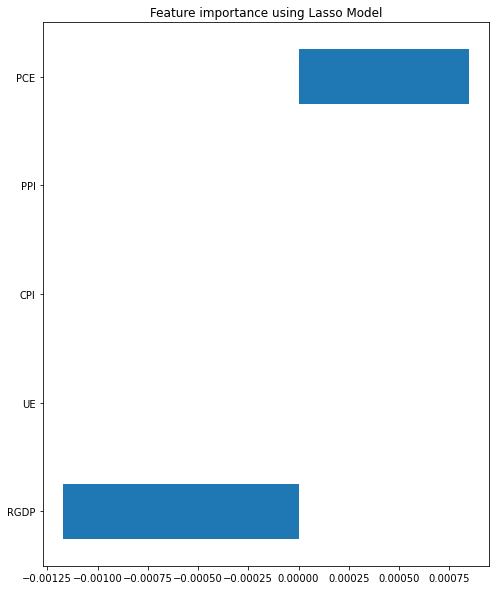

In [40]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
